# Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning and Loading

In [42]:
df=pd.read_csv("Datasets/adult.csv")

In [43]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [45]:
df.value_counts()

age  workclass         fnlwgt  education     education.num  marital.status      occupation         relationship   race   sex     capital.gain  capital.loss  hours.per.week  native.country  income
25   Private           195994  1st-4th       2              Never-married       Priv-house-serv    Not-in-family  White  Female  0             0             40              Guatemala       <=50K     3
23   Private           240137  5th-6th       3              Never-married       Handlers-cleaners  Not-in-family  White  Male    0             0             55              Mexico          <=50K     2
38   Private           207202  HS-grad       9              Married-civ-spouse  Machine-op-inspct  Husband        White  Male    0             0             48              United-States   >50K      2
30   Private           144593  HS-grad       9              Never-married       Other-service      Not-in-family  Black  Male    0             0             40              ?               <=50K     2


In [46]:
df.shape

(32561, 15)

In [47]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [48]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

# Data Visualization

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education.num'}>,
        <AxesSubplot:title={'center':'capital.gain'}>],
       [<AxesSubplot:title={'center':'capital.loss'}>,
        <AxesSubplot:title={'center':'hours.per.week'}>]], dtype=object)

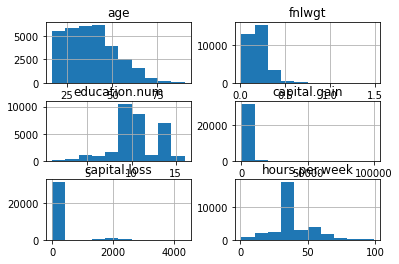

In [49]:
df.hist()

<AxesSubplot:>

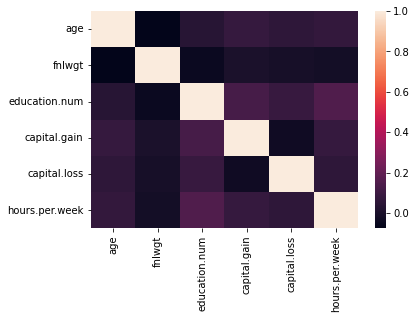

In [50]:
sns.heatmap(df.corr())

# Data Splitting

In [52]:
from sklearn.preprocessing import LabelEncoder


df = df.apply(LabelEncoder().fit_transform)

In [54]:
x_class=df.drop(['race'],axis=1)
y_class=df['race']

In [ ]:
x_reg=df.drop(['age'],axis=1)
y_reg=df['age']

# Classification Models

In [55]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_class,y_class,test_size=0.3,random_state=0)

## Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
model.score(x_train,y_train)

1.0

In [58]:
y_pred=model.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7828846350701197

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[   6,    2,    4,    0,   81],
       [   2,  177,   16,    2,  109],
       [  10,   15,  241,   10,  679],
       [   3,    5,   10,    4,   56],
       [  91,  123,  824,   79, 7220]], dtype=int64)

## Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [62]:
y_pred=model.predict(x_test)
model.score(x_train,y_train)

0.7862407862407862

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7832940935612652

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[   6,    0,    6,    2,   79],
       [   4,   35,   10,   23,  234],
       [   3,   22,  188,   28,  714],
       [   1,    7,    8,   14,   48],
       [  50,  186,  490,  202, 7409]], dtype=int64)

## SVM

In [65]:
# from sklearn.svm import SVC
# model=SVC()
# model.fit(x_train,y_train)

In [66]:
y_pred=model.predict(x_test)
model.score(x_train,y_train)

0.7862407862407862

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7832940935612652

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[   6,    0,    6,    2,   79],
       [   4,   35,   10,   23,  234],
       [   3,   22,  188,   28,  714],
       [   1,    7,    8,   14,   48],
       [  50,  186,  490,  202, 7409]], dtype=int64)

## KNN Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [70]:
y_pred=model.predict(x_test)
model.score(x_train,y_train)

0.868989118989119

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8330433002354386

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[   5,    2,    0,    0,   86],
       [   1,   43,   14,    0,  248],
       [   0,   11,   64,    1,  879],
       [   0,    3,    2,    0,   73],
       [   5,   57,  246,    3, 8026]], dtype=int64)

## Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

c:\Users\Mihir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
y_pred=model.predict(x_test)
model.score(x_train,y_train)

0.8545542295542295

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8532091309243526

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[   0,    0,    0,    0,   93],
       [   0,    0,    0,    0,  306],
       [   0,    0,    0,    0,  955],
       [   0,    0,    0,    0,   78],
       [   0,    0,    2,    0, 8335]], dtype=int64)

# Regression Models

In [77]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_reg,y_reg,test_size=0.3,random_state=0)

## Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [79]:
y_pred=model.predict(x_test)
model.score(x_train,y_train)

0.04005462452224828

## Decision Tree

In [81]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [82]:
y_pred=model.predict(x_test)
model.score(x_train,y_train)

1.0

## KNN Regressor

In [83]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(x_train,y_train)

KNeighborsRegressor()

In [84]:
y_pred=model.predict(x_test)
model.score(x_train,y_train)

0.2917282318612594

## Lasso Regression

In [85]:
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(x_train,y_train)

Lasso()

In [86]:
y_pred=model.predict(x_test)
model.score(x_train,y_train)

0.00010598425066743467